In [2]:
import os

# 현재 경로 확인
train_dir = os.path.abspath('Train')
test_dir = os.path.abspath('Test')
print("Train 디렉토리 경로:", train_dir)
print("Test 디렉토리 경로:", test_dir)


Train 디렉토리 경로: c:\Users\there\Desktop\SV\project2\archive\Train
Test 디렉토리 경로: c:\Users\there\Desktop\SV\project2\archive\Test


Found 27455 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


c:\Users\there\anaconda3\envs\pytorch_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\there\anaconda3\envs\pytorch_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.5445 - loss: 1.6082 - val_accuracy: 0.8984 - val_loss: 0.3494
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.9459 - loss: 0.1649 - val_accuracy: 0.8602 - val_loss: 0.5857
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 45s 52ms/step - accuracy: 0.9690 - loss: 0.0953 - val_accuracy: 0.9183 - val_loss: 0.3723
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 59s 69ms/step - accuracy: 0.9755 - loss: 0.0727 - val_accuracy: 0.9384 - val_loss: 0.3453
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - accuracy: 0.9779 - loss: 0.0621 - val_accuracy: 0.9225 - val_loss: 0.4715
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.9798 - loss: 0.0606 - val_accuracy: 0.9031 - val_loss: 0.5633
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.9820 - loss: 0.0589 - val_accuracy: 0.9385 - val_loss: 0.3977
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.9826 - loss: 0.0558 - 

모델이 저장되었습니다.


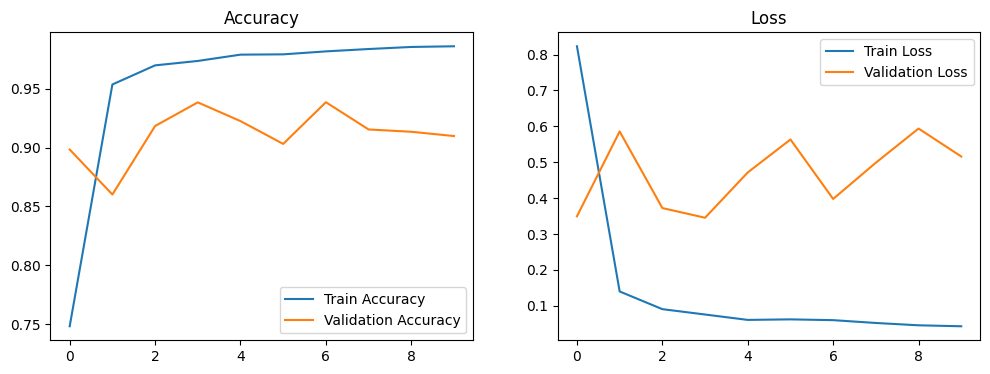

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

# 데이터 경로 설정
train_dir = r'C:\Users\there\Desktop\SV\project2\archive\Train'
test_dir = r'C:\Users\there\Desktop\SV\project2\archive\Test'

# 이미지 데이터 증강기 설정
datagen = ImageDataGenerator(rescale=1./255)

# Train 데이터 로드
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse'
)

# Test 데이터 로드
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse'
)

# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # 클래스 개수 자동 설정
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10
)

# 학습된 모델 저장
model.save('gesture_model22.h5')
print("모델이 저장되었습니다.")

# 학습 결과 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()

In [6]:
import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model

# MediaPipe Hands 초기화
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    static_image_mode=False,  # 실시간 영상에 적합
    max_num_hands=1,          # 감지할 손의 최대 개수
    min_detection_confidence=0.5,  # 손 검출 최소 신뢰도
    min_tracking_confidence=0.5    # 추적 최소 신뢰도
)

# 학습된 모델 로드
model = load_model('gesture_model22.h5')

# 클래스 이름 (Train 데이터 클래스와 동일해야 함)
classes = list(train_generator.class_indices.keys())  # 클래스 이름 자동 가져오기

# 랜드마크를 28x28 이미지로 변환
def landmarks_to_image(landmarks):
    """
    손 랜드마크 데이터를 28x28 이미지로 변환.
    """
    image = np.zeros((28, 28), dtype=np.float32)  # 28x28 크기의 빈 이미지 생성
    for lm in landmarks:
        x = max(0, min(27, int(lm[0] * 27)))  # x 좌표 스케일링 및 범위 제한
        y = max(0, min(27, int(lm[1] * 27)))  # y 좌표 스케일링 및 범위 제한
        image[y, x] = 1.0  # 해당 위치 활성화
    return image

# 예측 함수
def predict_gesture(landmarks):
    """
    손 랜드마크 좌표를 입력으로 받아 모델이 요구하는 28x28 이미지로 변환하고 예측.
    """
    image = landmarks_to_image(landmarks).reshape(1, 28, 28, 1)  # 28x28x1로 변환
    prediction = model.predict(image)  # 모델 예측
    class_id = np.argmax(prediction)  # 가장 높은 확률의 클래스 ID 반환
    return classes[class_id]

# 카메라 열기
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("카메라를 열 수 없습니다.")
    exit()

print("카메라가 실행되었습니다. Q 키를 눌러 종료하세요.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("프레임을 가져올 수 없습니다.")
        break

    # 화면 좌우 반전 (자연스러운 거울 효과)
    frame = cv2.flip(frame, 1)

    # BGR 이미지를 RGB로 변환 (MediaPipe는 RGB를 사용)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # 손 감지 및 랜드마크 추출
    result = hands.process(rgb_frame)

    # 손이 감지되었을 때
    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            # 랜드마크 좌표 추출
            landmarks = [[lm.x, lm.y, lm.z] for lm in hand_landmarks.landmark]

            # 예측 수행
            predicted_class = predict_gesture(landmarks)

            # 랜드마크 및 예측 결과 화면에 표시
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            cv2.putText(frame, f"Prediction: {predicted_class}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # 화면 출력
    cv2.imshow("Gesture Recognition", frame)

    # Q 키를 누르면 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 리소스 해제
cap.release()
cv2.destroyAllWindows()
hands.close()


카메라가 실행되었습니다. Q 키를 눌러 종료하세요.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━

In [7]:
%pip install pygame


   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   -------------------- ------------------- 5.5/10.6 MB 27.9 MB/s eta 0:00:01
   ----------------------------------- ---- 9.4/10.6 MB 23.5 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 22.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
import os
import pygame
from time import sleep

# Pygame 초기화
pygame.init()

# 화면 크기 설정
screen = pygame.display.set_mode((800, 600))
pygame.display.set_caption("수화 디스플레이")

# 색상 정의
WHITE = (255, 255, 255)

# 수화 이미지 디렉토리
SIGN_IMAGE_DIR = "sign_images"

def load_images():
    """
    알파벳 A-Z에 해당하는 수화 이미지를 로드합니다.
    """
    images = {}
    for char in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
        image_path = os.path.join(SIGN_IMAGE_DIR, f"{char}.png")
        if os.path.exists(image_path):
            images[char] = pygame.image.load(image_path)
        else:
            print(f"이미지가 없습니다: {image_path}")
    return images

def display_sign(text, images):
    """
    입력된 텍스트에 따라 수화 이미지를 차례로 화면에 표시합니다.
    """
    for char in text.upper():
        if char in images:
            screen.fill(WHITE)  # 배경색 초기화
            image = images[char]
            image = pygame.transform.scale(image, (400, 400))  # 이미지 크기 조정
            screen.blit(image, (200, 100))  # 화면 중앙에 표시
            pygame.display.update()
            sleep(1)  # 1초 동안 이미지 표시
        else:
            print(f"지원되지 않는 문자: {char}")

def main():
    # 이미지 로드
    images = load_images()
    if not images:
        print("이미지를 로드할 수 없습니다.")
        return

    # 입력 텍스트
    input_text = "apple"  # 여기에서 텍스트를 변경할 수 있습니다.

    # 수화 이미지 표시
    display_sign(input_text, images)

    # 종료 메시지
    print("모든 알파벳이 표시되었습니다.")
    sleep(2)
    pygame.quit()

if __name__ == "__main__":
    main()


모든 알파벳이 표시되었습니다.


In [13]:
input_text = input("Enter a word: ")

In [20]:
import os
import pygame
from time import sleep

# Pygame 초기화
pygame.init()

# 화면 크기 설정
screen = pygame.display.set_mode((800, 600))
pygame.display.set_caption("수화 이미지 디스플레이")

# 색상 정의
WHITE = (255, 255, 255)

# 수화 이미지 디렉토리
SIGN_IMAGE_DIR = "sign_images"

def load_images():
    """
    알파벳 A-Z에 해당하는 수화 이미지를 로드합니다.
    """
    images = {}
    for char in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
        image_path = os.path.join(SIGN_IMAGE_DIR, f"{char}.png")
        if os.path.exists(image_path):
            images[char] = pygame.image.load(image_path)
        else:
            print(f"이미지가 없습니다: {image_path}")
    return images

def display_sign(text, images):
    """
    입력된 텍스트에 따라 수화 이미지를 차례로 화면에 표시합니다.
    """
    for char in text.upper():
        if char in images:
            screen.fill(WHITE)  # 배경 초기화
            image = images[char]
            image = pygame.transform.scale(image, (400, 400))  # 이미지 크기 조정
            screen.blit(image, (200, 100))  # 화면 중앙에 이미지 표시
            pygame.display.update()
            sleep(2)  # 1초 동안 이미지 표시
        else:
            print(f"지원되지 않는 문자: {char}")

def main():
    # 이미지 로드
    images = load_images()
    if not images:
        print("이미지를 로드할 수 없습니다.")
        return

    # 사용자 입력
    input_text = input("Enter a word: ")

    # 수화 이미지 표시
    display_sign(input_text, images)

    # 종료 메시지
    print("모든 알파벳이 표시되었습니다.")
    sleep(2)
    pygame.quit()

if __name__ == "__main__":
    main()


모든 알파벳이 표시되었습니다.


In [23]:
import os
import pygame

# Pygame 초기화
pygame.init()

# 화면 크기 설정
screen = pygame.display.set_mode((800, 600))
pygame.display.set_caption("수화 이미지 디스플레이")

# 색상 정의
WHITE = (255, 255, 255)

# 수화 이미지 디렉토리
SIGN_IMAGE_DIR = "sign_images"

def load_images():
    """
    알파벳 A-Z에 해당하는 수화 이미지를 로드합니다.
    """
    images = {}
    for char in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
        image_path = os.path.join(SIGN_IMAGE_DIR, f"{char}.png")
        if os.path.exists(image_path):
            images[char] = pygame.image.load(image_path)
        else:
            print(f"이미지가 없습니다: {image_path}")
    return images

def display_sign(text, images):
    """
    입력된 텍스트에 따라 수화 이미지를 차례로 화면에 표시합니다.
    """
    clock = pygame.time.Clock()  # Pygame의 타이밍 컨트롤러
    index = 0  # 현재 표시 중인 문자 인덱스
    display_time = 60  # 각 이미지를 표시할 프레임 수 (1초 = 60프레임)

    running = True
    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

        # 화면 초기화
        screen.fill(WHITE)

        # 현재 문자 이미지 표시
        if index < len(text):
            char = text[index].upper()
            if char in images:
                image = images[char]
                image = pygame.transform.scale(image, (400, 400))  # 이미지 크기 조정
                screen.blit(image, (200, 100))  # 화면 중앙에 이미지 표시

            # 표시 시간이 지나면 다음 문자로 이동
            display_time -= 1
            if display_time == 0:
                index += 1
                display_time = 60  # 다음 문자를 1초 동안 표시
        else:
            # 모든 문자를 표시한 후 종료
            running = False

        pygame.display.update()
        clock.tick(60)  # 60프레임으로 제한

def main():
    # 이미지 로드
    images = load_images()
    if not images:
        print("이미지를 로드할 수 없습니다.")
        return

    # 사용자 입력
    input_text = input("Enter a word: ")

    # 수화 이미지 표시
    display_sign(input_text, images)

    # 종료 메시지
    print("모든 알파벳이 표시되었습니다.")
    pygame.quit()

if __name__ == "__main__":
    main()


모든 알파벳이 표시되었습니다.
